In [1]:
import BrownsvilleAPI
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
brownsville = BrownsvilleAPI.Brownsville()

Loading cached dataset...


In [ ]:
building_common_complaints = []
for _id in brownsville.buildings:
    common_complaints = brownsville.get_feature_occurrences_by_building(
                                                            _id,
                                                            by=["majorcategory", "minorcategory"],
                                                            find_all=True)

    building_common_complaints.append((_id, common_complaints))
building_common_complaints.sort(key=lambda e: e[1].values.sum(), reverse=True)

In [ ]:
for building in building_common_complaints[:10]:
    id_, complaints = building
    major_category, minor_category = complaints.index[0]
    num_complaints = complaints.values.sum()

    print("Building ID:", id_)
    print("Most common major category:", major_category)
    print("Most common minor category:", minor_category)
    print("Number of complaints:", num_complaints)

    print()

In [ ]:
complaints_by_month = brownsville.records_by_date(period="year")
x, y = complaints_by_month.index, complaints_by_month.values
plt.bar(x, y)

In [ ]:
x, y = brownsville.records_by_season()
plt.bar(x, y)

In [ ]:
complaints_by_month = brownsville.records_by_date()
x, y = complaints_by_month.index, complaints_by_month.values
plt.bar(x, y)

In [ ]:
brownsville.data.dtypes

[2014, 2015, 2016, 2017] [840, 3347, 2371, 2769] 2014 to 2017
[2018, 2019, 2020, 2021] [3124, 2573, 956, 885] 2018 to 2021


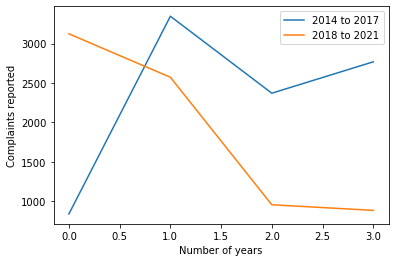

In [26]:
steps = 4
years = brownsville.records_by_date(period="year", num_years=8, step=steps)

for year in years:

    x = list(year.index.values)
    y = list(year.values)
    label = f"{year.index[0]} to {year.index[-1]}"

    print(x, y, label)
    plt.plot(np.arange(0, steps), y, label=label)
    
plt.xlabel("Number of years")
plt.ylabel("Complaints reported")
plt.legend()
plt.show()